In [1]:
import os
os.sys.path.append(os.path.dirname(os.path.abspath('.')))

TensorFlow中自带了实现数据增强的API，主要分为四类：
- Resizing
- Cropping
- Flipping and Transposing
- Image Adjustments

In [2]:
import tensorflow as tf

config = tf.ConfigProto()
config.gpu_options.allow_growth = True    # 按需使用显存

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


# 数据准备
这里使用CIFAR-10中的三张图片，模拟训练过程中的一个batch。

In [3]:
import matplotlib.pyplot as plt
from dataset.dataset import load_cifar10
import numpy as np

train_data, test_data = load_cifar10(batch_size=64)
for batch_data, _ in train_data.next_batch():
    img_batch = batch_data
    break

batch_size = 5
img_batch = img_batch[:batch_size].reshape(
    (-1, 3, 32, 32)).transpose((0, 2, 3, 1))

/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype uint8 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


(50000, 3072) (50000,)


/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype uint8 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


(10000, 3072) (10000,)


<Figure size 640x480 with 0 Axes>

<Figure size 1000x200 with 5 Axes>

In [ ]:
plt.clf()
fig, axs = plt.subplots(1, batch_size, figsize=(10, 2))
for i in range(batch_size):
    axs[i].imshow(img_batch[i])
plt.show()

## Resizing
```tf.image.resize_images```同时支持batch输入与单张图片输入，有四种插值方法：BILINEAR、NEAREST_NEIGHBOR、BICUBIC和AREA，除了NEAREST_NEIGHBOR，另外三种方法都只能接受```float```格式的输入，所以为了最大兼容性，在缩放图片之前，需要将图片转换成浮点格式。同样的，标准的RBG三通道图片格式为```uint8```，所以在可视化或保存图片时还要再做转换。

<Figure size 432x288 with 0 Axes>

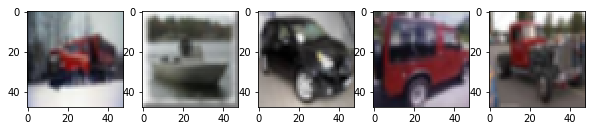

In [4]:
with tf.name_scope('img_resize'):
    img = tf.image.resize_images(img_batch, (48, 48), method=0)

with tf.Session(config=config) as sess:
    res = sess.run(img)

plt.clf()
fig, axs = plt.subplots(1, batch_size, figsize=(10, 2))
for i in range(batch_size):
    axs[i].imshow(res[i])
plt.show()

## Cropping
- ```tf.image.pad_to_bounding_box(image, offset_height, offset_width, target_height, target_width)```：边缘填充
- ```tf.image.crop_to_bounding_box(image, offset_height, offset_width, target_height, target_width)```：裁剪
- ```tf.image.random_crop(image, size, seed=None, name=None)```：随机裁剪，需指定所有维度

Instructions for updating:
Colocations handled automatically by placer.


<Figure size 432x288 with 0 Axes>

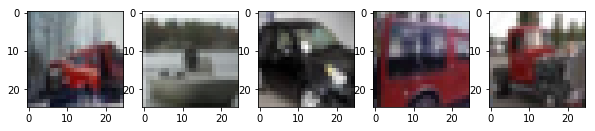

In [5]:
with tf.name_scope('img_crop'):
    img = tf.image.random_crop(img_batch, size=(img_batch.shape[0], 25, 25, 3))

with tf.Session(config=config) as sess:
    res = sess.run(img)

plt.clf()
fig, axs = plt.subplots(1, batch_size, figsize=(10, 2))
for i in range(batch_size):
    axs[i].imshow(res[i])
plt.show()

<Figure size 432x288 with 0 Axes>

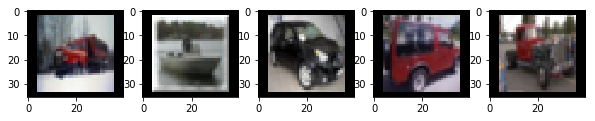

In [6]:
with tf.name_scope('img_crop'):
    img = tf.image.pad_to_bounding_box(img_batch, offset_height=2, offset_width=4,
                                       target_height=36, target_width=40)

with tf.Session(config=config) as sess:
    res = sess.run(img)

plt.clf()
fig, axs = plt.subplots(1, batch_size, figsize=(10, 2))
for i in range(batch_size):
    axs[i].imshow(res[i])
plt.show()

## Flipping and Transposing
- ```tf.image.random_flip_up_down(image)```
- ```tf.image.random_flip_left_right(image)```
- ```tf.image.transpose_image(image)```

<Figure size 432x288 with 0 Axes>

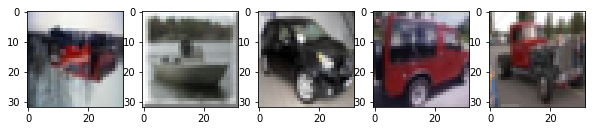

In [7]:
with tf.name_scope('img_crop'):
    img = tf.image.random_flip_up_down(img_batch)

with tf.Session(config=config) as sess:
    res = sess.run(img)

plt.clf()
fig, axs = plt.subplots(1, batch_size, figsize=(10, 2))
for i in range(batch_size):
    axs[i].imshow(res[i])
plt.show()

## Adjustments
- ```tf.image.adjust_brightness(image, delta, min_value=None, max_value=None)```
- ```tf.image.random_brightness(image, max_delta, seed=None)```
- ```tf.image.adjust_contrast(images, contrast_factor, min_value=None, max_value=None)```
- ```tf.image.random_contrast(image, lower, upper, seed=None)```

<Figure size 432x288 with 0 Axes>

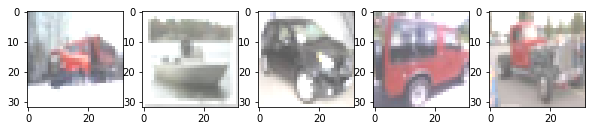

In [54]:
with tf.name_scope('img_crop'):
    img = tf.image.random_brightness(img_batch,max_delta=0.4)

with tf.Session(config=config) as sess:
    res = sess.run(img)
    res[res>1]=1
    res[res<0]=0

plt.clf()
fig, axs = plt.subplots(1, batch_size, figsize=(10, 2))
for i in range(batch_size):
    axs[i].imshow(res[i])
plt.show()